### Задание:  
Предоставлены тестовые данные по клиентам банка, которые имеют кредит. Необходимо:  
1. Исследовать данные и обработать их для проведения последующей сегментации  
2. Составить профили клиентов на основе проведенных сегментаций  
  
  
Нужно использовать минимум 2 метода сегментации: бизнес-правила, квантили, сегменты на основе данных кластеризации с учителем (Дерево решений, регрессия, нейросети, градиентный бустинг и тд) или без учителя (Метод K-средних, Mean-shift, DBSCAN, Иерархическая кластеризация и тд.)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('HW1_var_15.csv', sep=';', encoding='utf-8')
data = data.drop(columns=['Номер варианта', 'ID'])
column_info = pd.DataFrame(index=data.columns)

In [2]:
columns = data.columns
n = data.shape[0]
for i in columns:
    uniques = data[i].unique().shape[0]
    column_info.at[i, 'Уникальные'] = f'{round(uniques*100/n, 3)}% ({int(uniques)})'
    
    nulls = data[i].isna().sum()
    column_info.at[i, 'Пустые'] = f'{round(nulls*100/n, 3)}% ({int(nulls)})'
    
    column_info.at[i, 'Тип'] = data[i].dtype
    
    if data[i].dtype != 'int64' and data[i].dtype != 'float64':
        column_info.at[i, 'Нулевые'] = ''
        column_info.at[i, 'Среднее'] = ''
        column_info.at[i, 'Медиана'] = ''
        column_info.at[i, 'Среднее отклонение'] = ''
        column_info.at[i, 'Минимум'] = ''
        column_info.at[i, 'Максимум'] = ''
    else:
        zeros = data[data[i] == 0].shape[0]
        column_info.at[i, 'Нулевые'] = f'{round(zeros*100/n, 3)}% ({int(zeros)})'
        column_info.at[i, 'Среднее'] = f'{str(round(data[i].mean(), 3))}'
        column_info.at[i, 'Медиана'] = f'{str(round(data[i].median(), 3))}'
        column_info.at[i, 'Среднее отклонение'] =  f'{str(round(data[i].std(), 3))}'
        column_info.at[i, 'Минимум'] = f'{str(round(data[i].min(), 3))}'
        column_info.at[i, 'Максимум'] = f'{str(round(data[i].max(), 3))}'

## Часть 1
По каждой характеристике были расчитаны следующие данные:
* количество уникальных значений, их доля от общего числа
* количество пустых (незаполненных), их доля от общего числа
* тип характеристики (object - текстовый категориальный признак, int64 - числовой категориальный, float64 - числовой категориальный, бинарный категориальный или числовой признак) 
* количество нулевые значения, их доля от общего числа
* среднее значение по данной характеристике
* медиана
* среднее отклонение
* минимум и максимум на данной характеристике

In [3]:
column_info

Уникальные          Пустые      Тип  \
INCOME_BASE_TYPE           0.049% (5)     0.527% (54)   object   
CREDIT_PURPOSE            0.098% (10)        0.0% (0)   object   
INSURANCE_FLAG             0.029% (3)       0.01% (1)  float64   
DTI                       0.576% (59)    1.123% (115)  float64   
SEX                         0.02% (2)        0.0% (0)   object   
FULL_AGE_CHILD_NUMBER      0.078% (8)        0.0% (0)    int64   
DEPENDANT_NUMBER           0.039% (4)        0.0% (0)    int64   
EDUCATION                  0.088% (9)        0.0% (0)   object   
EMPL_TYPE                 0.098% (10)      0.078% (8)   object   
EMPL_SIZE                  0.088% (9)    1.084% (111)   object   
BANKACCOUNT_FLAG           0.049% (5)  22.652% (2320)  float64   
Period_at_work           3.534% (362)  22.662% (2321)  float64   
age                        0.41% (42)  22.652% (2320)  float64   
EMPL_PROPERTY             0.127% (13)  22.652% (2320)   object   
EMPL_FORM                  0.068% (7)  61.609% (6310)   object   
FAMILY_STATUS              0.068% (7)  61.609% (6310)   object   
max90days                 0.205% (21)  62.127% (6363)  float64   
max60days                 0.186% (19)  62.127% (6363)  float64   
max30days                 0.166% (17)  62.127% (6363)  float64   
max21days                 0.137% (14)  62.127% (6363)  float64   
max14days                 0.137% (14)  62.127% (6363)  float64   
avg_num_delay          11.248% (1152)  64.704% (6627)  float64   
if_zalog                   0.029% (3)  64.567% (6613)  float64   
num_AccountActive180       0.078% (8)  64.567% (6613)  float64   
num_AccountActive90        0.059% (6)  64.567% (6613)  float64   
num_AccountActive60        0.049% (5)  64.567% (6613)  float64   
Active_to_All_prc         0.888% (91)  64.567% (6613)  float64   
numAccountActiveAll       0.127% (13)  64.567% (6613)  float64   
numAccountClosed          0.254% (26)  64.567% (6613)  float64   
sum_of_paym_months       3.124% (320)  64.567% (6613)  float64   
all_credits               0.303% (31)  64.567% (6613)  float64   
Active_not_cc             0.098% (10)  64.567% (6613)  float64   
own_closed                 0.088% (9)  64.567% (6613)  float64   
min_MnthAfterLoan        0.996% (102)  64.567% (6613)  float64   
max_MnthAfterLoan        1.328% (136)  64.567% (6613)  float64   
dlq_exist                  0.029% (3)  64.567% (6613)  float64   
thirty_in_a_year           0.029% (3)  64.567% (6613)  float64   
sixty_in_a_year            0.029% (3)  64.567% (6613)  float64   
ninety_in_a_year           0.029% (3)  64.567% (6613)  float64   
thirty_vintage             0.029% (3)  64.567% (6613)  float64   
sixty_vintage              0.029% (3)  64.567% (6613)  float64   
ninety_vintage             0.029% (3)  64.567% (6613)  float64   

                               Нулевые Среднее Медиана Среднее отклонение  \
INCOME_BASE_TYPE                                                            
CREDIT_PURPOSE                                                              
INSURANCE_FLAG          38.606% (3954)   0.614     1.0              0.487   
DTI                          0.02% (2)   0.387     0.4              0.137   
SEX                                                                         
FULL_AGE_CHILD_NUMBER   59.568% (6101)    0.55     0.0              0.762   
DEPENDANT_NUMBER       99.629% (10204)   0.005     0.0              0.085   
EDUCATION                                                                   
EMPL_TYPE                                                                   
EMPL_SIZE                                                                   
BANKACCOUNT_FLAG         61.14% (6262)   0.381     0.0              0.867   
Period_at_work                0.0% (0)  66.701    45.0             67.128   
age                           0.0% (0)  36.522    35.0              8.674   
EMPL_PROPERTY                                                               
EMPL_FORM                        

Нулевые данные не мешают, так как либо они осмысленнно что-то значат, либо это категория бинарного признака  

В каких данных мы можем встретить странности?  
Что могло бы быть:
* Какие-то странные значения для того или иного поля (числа среди категориальных, слишком большой или маленький возраст и т.д.)
* Чрезвычайно большие числа по кол-ву запросов, аккаунтов, счетов и т.д.
* Кол-во месяцев, прошедших с последнего выданного кредита превышает кол-во месяцев от первого выданного
* Что-либо просроченно на 90 дней, но не просрочено на 30 дней и т.п.  

Например, для характеристики min_MnthAfterLoan минимальное значение равно -1.
Данный параметр отвечает за минимальное кол-во месяцев, которое прошло с момета взятия прошлого кредита клиентом. То есть
как давно выдали последний кредит клиенту. Непонятно, как его интерпретировать. Однако таких строчек всего 19 штук, поэтому
можно от них избавиться, не сильно потеряв в данных, что и было сделано

In [4]:
print(f'{data[data.min_MnthAfterLoan == -1].shape[0]} строк с min_MnthAfterLoan = -1')
data = data[data.min_MnthAfterLoan != -1]

19 строк с min_MnthAfterLoan = -1


Также интересно посмотреть, нет ли такого, что последний кредит выдан раньше первого и есть ли просрочки по выплатам на 90 дней, но не на 30 и т.п. Так как логика по просроченным платежам не совсем ясна, я заменю данные по следующим правилам:  
* если есть просрочка на N дней за год/когда-либо, то и на M дней, где M < N, тоже есть
* если есть просрочка на N дней за год, то есть и на N дней когда-либо

In [5]:
import warnings
warnings.filterwarnings("ignore")

print(f'Количество клиентов, последний кредит которым выдан раньше первого по предложенным данным: ', end='')
print(f'{data[data.min_MnthAfterLoan > data.max_MnthAfterLoan].shape[0]}')
print()
print('Просрочка больше 90 дней за последний год, но меньше 60: ', end='')
print(data[data['ninety_in_a_year'] == 1][data['sixty_in_a_year'] == 0].shape[0])
print('Просрочка больше 90 дней за последний год, но меньше 30: ', end='')
print(data[data['ninety_in_a_year'] == 1][data['thirty_in_a_year'] == 0].shape[0])
print('Просрочка больше 60 дней за последний год, но меньше 30: ', end='')
print(data[data['sixty_in_a_year'] == 1][data['thirty_in_a_year'] == 0].shape[0])
print()
print('Просрочка больше 90 дней когда-либо, но меньше 60: ', end='')
print(data[data['ninety_vintage'] == 1][data['sixty_vintage'] == 0].shape[0])
print('Просрочка больше 90 дней когда-либо, но меньше 30: ', end='')
print(data[data['ninety_vintage'] == 1][data['thirty_vintage'] == 0].shape[0])
print('Просрочка больше 60 дней когда-либо, но меньше 30: ', end='')
print(data[data['sixty_vintage'] == 1][data['thirty_vintage'] == 0].shape[0])
print()
print('Просрочка больше 90 дней за год, но меньше 90 когда-либо: ', end='')
print(data[data['ninety_in_a_year'] == 1][data['ninety_vintage'] == 0].shape[0])
print('Просрочка больше 60 дней за год, но меньше 60 когда-либо: ', end='')
print(data[data['sixty_in_a_year'] == 1][data['sixty_vintage'] == 0].shape[0])
print('Просрочка больше 30 дней за год, но меньше 30 когда-либо: ', end='')
print(data[data['thirty_in_a_year'] == 1][data['thirty_vintage'] == 0].shape[0])


data.loc[:, 'sixty_in_a_year'][data['ninety_in_a_year'] == 1] = 1
data.loc[:, 'thirty_in_a_year'][data['ninety_in_a_year'] == 1] = 1
data.loc[:, 'thirty_in_a_year'][data['sixty_in_a_year'] == 1] = 1

data.loc[:, 'sixty_vintage'][data['ninety_vintage'] == 1] = 1
data.loc[:, 'thirty_vintage'][data['ninety_vintage'] == 1] = 1
data.loc[:, 'thirty_vintage'][data['sixty_vintage'] == 1] = 1

data.loc[:, 'ninety_vintage'][data['ninety_in_a_year'] == 1] = 1
data.loc[:, 'sixty_vintage'][data['sixty_in_a_year'] == 1] = 1
data.loc[:, 'thirty_vintage'][data['thirty_in_a_year'] == 1] = 1

Количество клиентов, последний кредит которым выдан раньше первого по предложенным данным: 0

Просрочка больше 90 дней за последний год, но меньше 60: 0
Просрочка больше 90 дней за последний год, но меньше 30: 0
Просрочка больше 60 дней за последний год, но меньше 30: 0

Просрочка больше 90 дней когда-либо, но меньше 60: 21
Просрочка больше 90 дней когда-либо, но меньше 30: 20
Просрочка больше 60 дней когда-либо, но меньше 30: 5

Просрочка больше 90 дней за год, но меньше 90 когда-либо: 172
Просрочка больше 60 дней за год, но меньше 60 когда-либо: 240
Просрочка больше 30 дней за год, но меньше 30 когда-либо: 430


Как можно заметить, начиная с EMPL_FORM и до ninety_vintage присутствует много пропусков значений (6310-6613 шт.), так как это количество составляет больше половины всех собранных данных (61.609% - 64.567%), выбрасывать их будет не логично. Это приведет к сильному сокращению выборки.  
Есть два пути решения: заменить эти пропуски на одно и то же число, которое будет отличаться от приведенных данных или попытаться заполнить пропуски рассматривая похожие категории клиентов.  
Там, где пропусков по признаку < 5%, я удалю данные. Для остальных категориальных признаков я введу категорию 'unknown', для числовых назначу бессмысленную константу -1. Однако эту операцию проделаю вконце Части 1, так как нам интересны распределения на имеющихся данных, а не на пустых

In [6]:
delete = ['INCOME_BASE_TYPE', 'INSURANCE_FLAG', 'DTI', 'EMPL_TYPE', 'EMPL_SIZE']

for i in delete:
    data = data[data[i].notna()]

Ниже представлена таблица корреляций между числовыми и числовыми категориальными признаками. По ней можно увидеть, что корреляция между признаками низкая. Высокая корреляция наблюдается между очевидно зависящими друг от друга признаками (кол-во просрочек за год и за все время, кол-во закрытых кредитов и всех и т.п.)  
Однако есть интересные высокие корреляции между следующими признаками:
* all_credits, sum_of_paym_month
* numAccountActiveAll и sum_of_paym_month
* numAccountClosed и sum_of_paym_month  

И все-таки линейно-регрессионый анализ к большинству характеристик тут не к месту

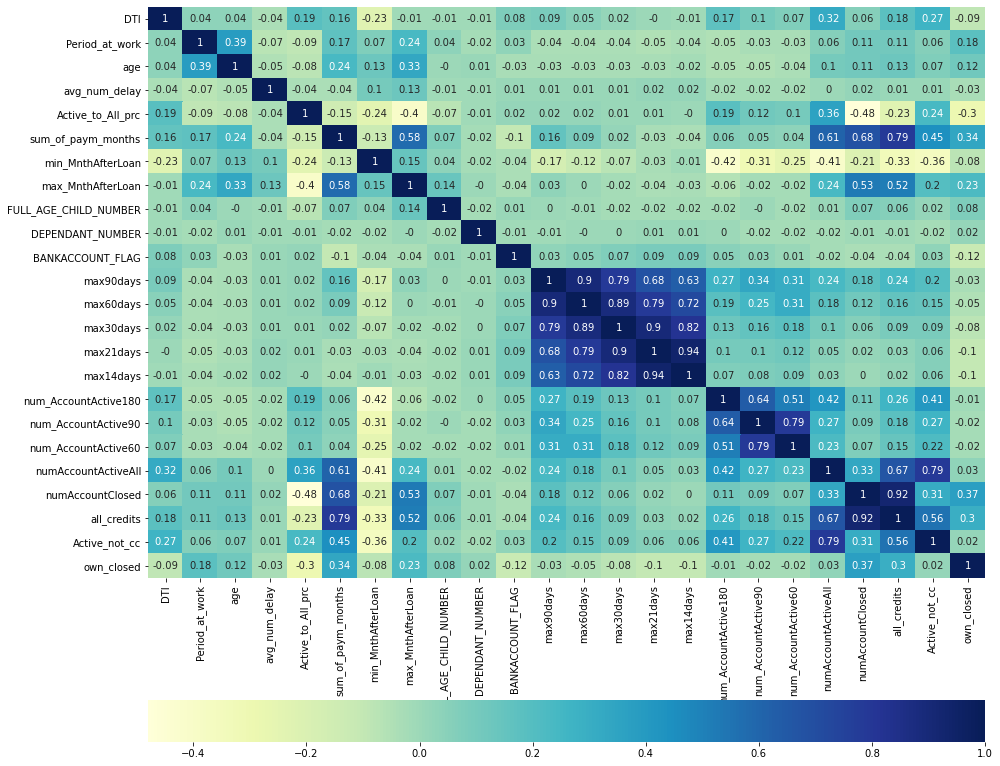

In [7]:
# Распределение характеристик по численным, бинарным, текстовым категориальным и численно категориальным
categorical = []
categorical_numeric = []
numeric = []
binary = []
for i in data.columns:
    if data[i].unique().shape[0] <= 3:
        binary.append(i)
    elif data[i].dtype == 'object':
        categorical.append(i)
    elif (data[i].dtype == 'int64' or data[i].dtype == 'float64') and data[i].unique().shape[0] >= 42:
        numeric.append(i)
    else:
        categorical_numeric.append(i)

corr = round(data.loc[:, numeric+categorical_numeric].corr(), 2)
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cbar_kws={"orientation": "horizontal"}, cmap='YlGnBu')


Ниже представлены графики распределения численных характеристик (без пропусков)

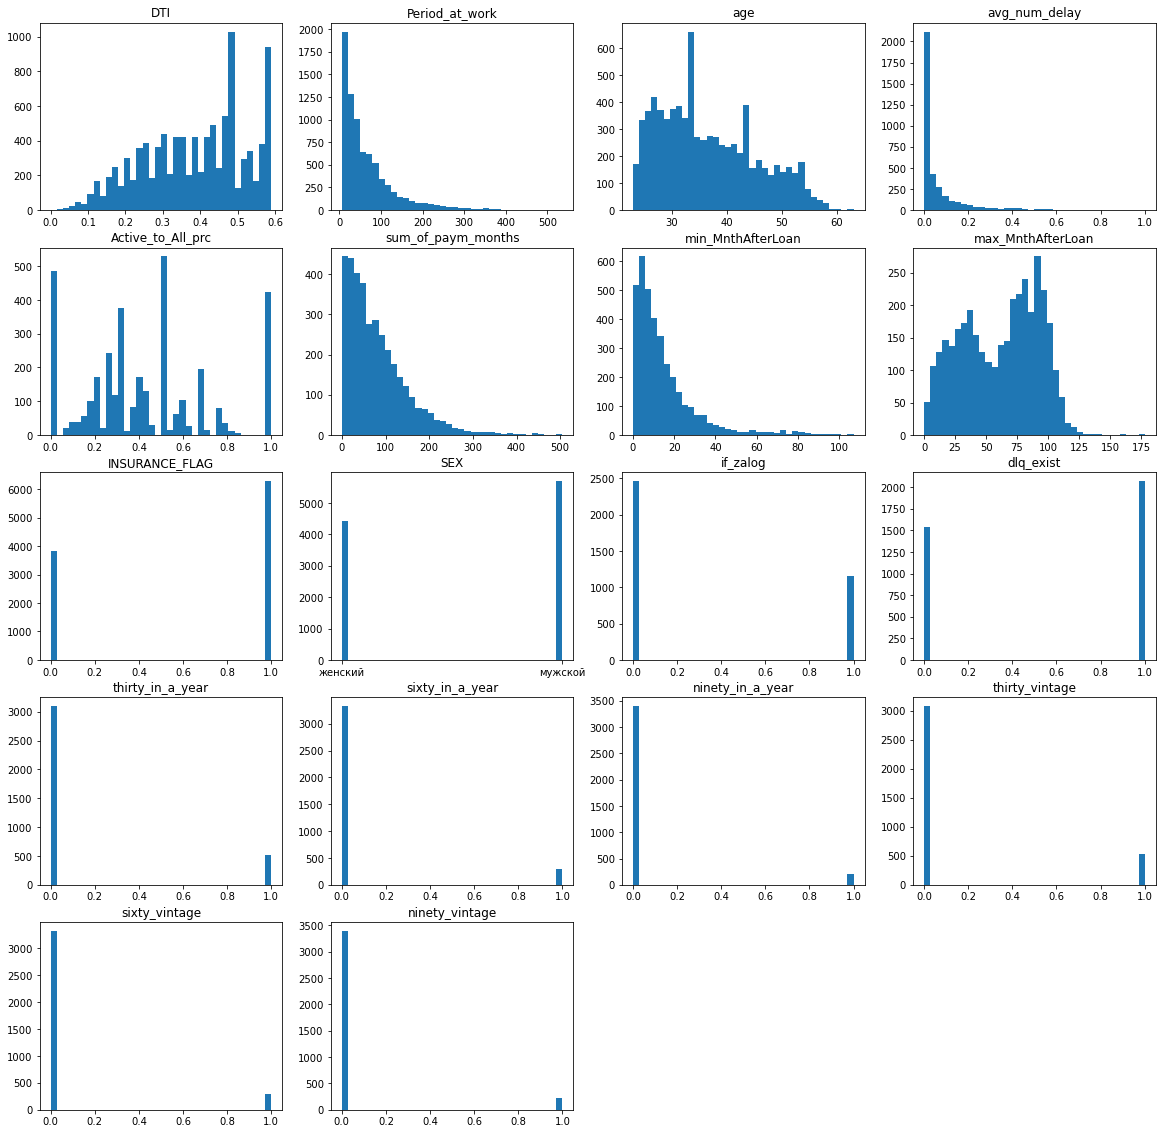

In [8]:
size = data.shape[0]

plt.figure(figsize=(20,20))

features = numeric+binary
for i in range(len(features)):
    ax = plt.subplot(5, 4, i + 1)
    ax.hist(data[data[features[i]] != 'unknown'][features[i]], bins = int(180/5))
    ax.set_title(features[i])

plt.show()

Из гистограмм видно, что в выборке
* большинство клиентов с высоким DTI (отношения долга к доходам)
* клиенты по большей части из возрастной категории 25 - 40 лет, также немало людей за 50
* На avg_num_delay есть большой выброс до 0.2, однако по большей части значения очень высокие
* соотношение активных счетов ко всем (Active_to_All_pr) вполне себе однородно на всей выборке
* большинство клиентов за последний месяц совершили платежи на сумму до 150 тыс. (sum_of_paym_months)
* с последнего кредита у всех в основном прошло до 20 месяцев (~1,5 года)
* кол-во месяцев с первого кредита представлено плюс-минус однородным числом клиентов и составляет от 0 до 100 месяцев
* бинарные признаки представлены далеко не в одинаковых количествах

Из этих данных мы можем сделать предположение, что могу появиться следующие кластеры: молодые люди (до 25 лет), взявшие свой первый кредит и имеющие доход еле покрывающий этот кредит; люди 30-40 лет с активной кредитной историей; люди постарше (40+ лет), имеющие богатую и активную кредитную историю.  
  
Далее рассмотрим гистораммы распределения по категориальным признакам (без

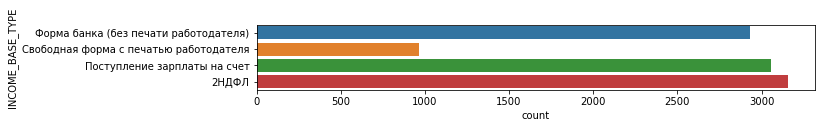

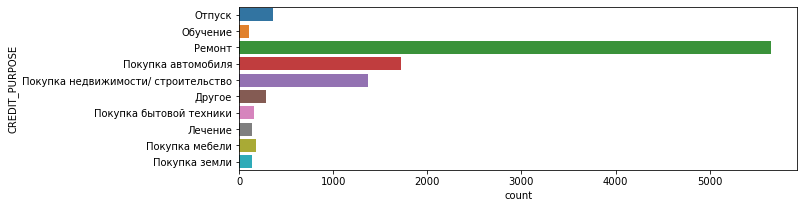

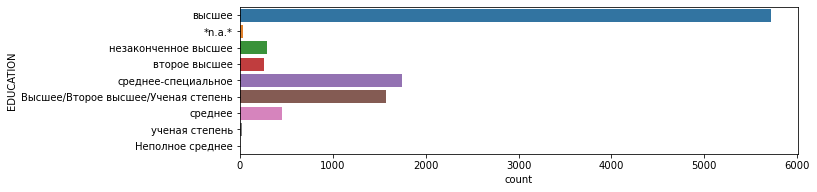

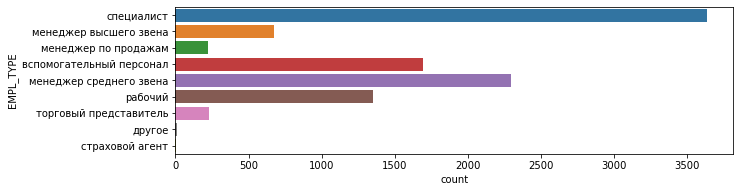

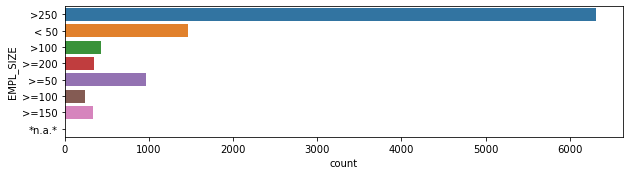

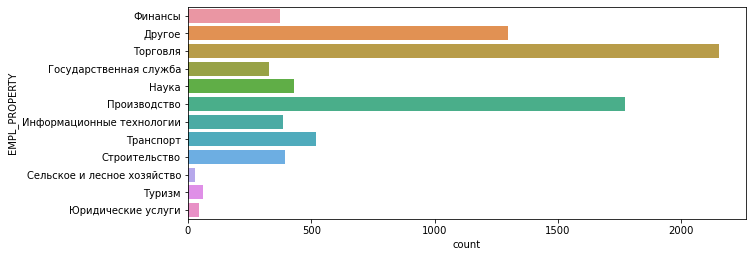

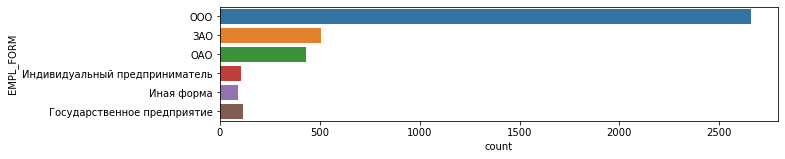

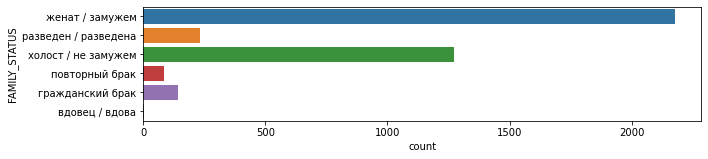

In [9]:
for i in categorical:
    plt.figure(figsize=(10,data[i].unique().shape[0]*0.3))
    sns.countplot(y = i, data = pd.DataFrame(data[i]))


Из данных гисторам для категориальных признаков можно сказать, что данные на них неоднородные. Есть много видимых выбросов:
* в CREDIT_PURPOSE есть явный выброс по категории 'Ремонт'
* есть также выброс на EDUCATION - клиенты в основном имеют высшее или два образования
* есть два четко выделяющихся кластера на EMPL_TYPE - рабочие среднего звена и специалисты
* данные собраны в основном по клиентам с зарплатой выше 250, но также хорошо выделяется класс людей с EMPL_SIZE <100
* выброс на EMPL_FORM - ООО
* два четко выделимых кластера - люди женатые/замужем и люди холостые
  
Но может быть такие выбросы облегчат нам выделение сегментов, так как данные достаточно четки различимы и неоднородны в количестве.  

**Выводы по Части 1**  
1. В данных много пропусков, выкидывать их нецелесообразно. Пропуски заменены на константу -100
2. Было одно невалидное значение на min_MnthAfterLoan - удалено
3. Ошибки в значения по просрочкам исправлены
4. Численные переменные имеют слабую корреляцию, линейно-регрессионный анализ неуместен

## Часть 2
Перед сегментацией мне было интересно изучить несколько пар признаков, на которых могут выявиться какие-то корреляции, зависимости, паттерны. (Без замены на 'unknown' и -1 пустых данных)

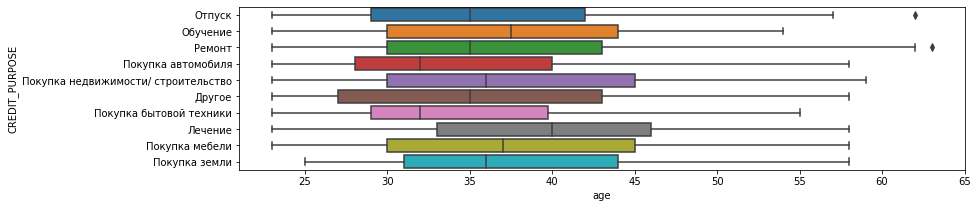

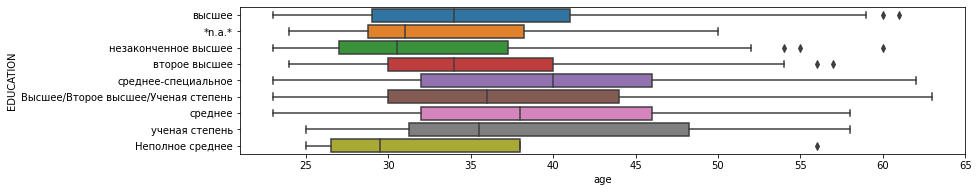

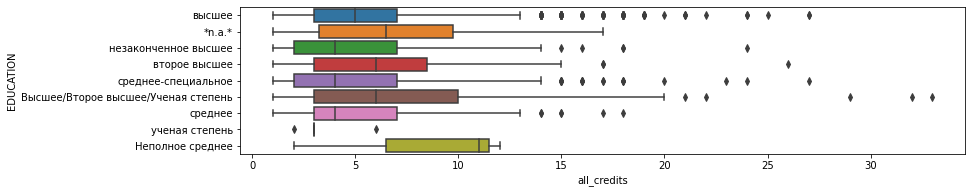

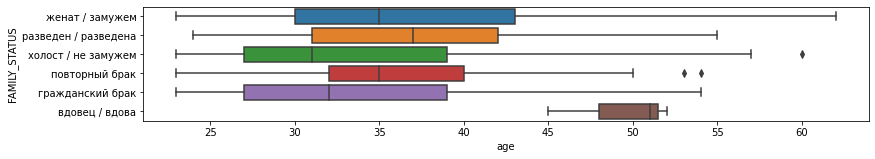

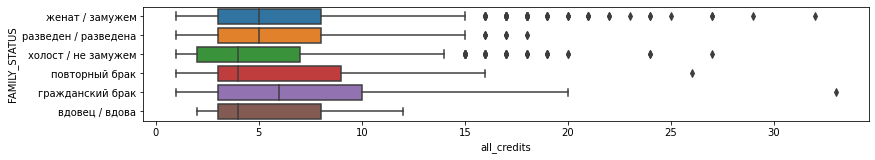

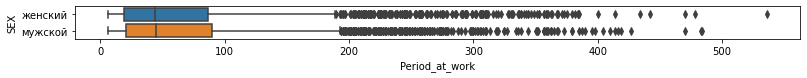

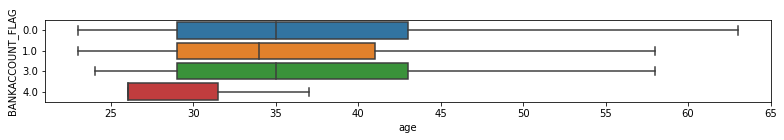

In [10]:
interesting_feature_pairs = [
('CREDIT_PURPOSE', 'age'),
('EDUCATION', 'age')
,('EDUCATION', 'all_credits')
,('FAMILY_STATUS', 'age')
,('FAMILY_STATUS', 'all_credits')
,('SEX', 'Period_at_work')
,('BANKACCOUNT_FLAG', 'age')
]

for i in interesting_feature_pairs:
    fig = plt.figure(figsize=(13, data[i[0]].unique().shape[0]*0.3))
    sns.boxplot(y=data[i[0]], x=data[i[1]], orient="h")


Видна логика в том, что CREDIT_PURPOSE для возрастных людей - на здоровье, люди среднего возраста часто берут кредит на большие покупки, отпуска и строительство, а вот автомобиль и бытовую технику в среднем берет молодежь - обживаются, вероятно. Интересность в том, что на образование в среднем тратятся люди среднего возраста. Это можно объяснить тем, что  либо данные с западных стран (там второе образование или магистерскиое звание часто получают в более поздном возрасте), либо люди тратятся на образование своих детей.  
  
Отношение возраста к уровню образования тоже логично. Много людей в возрасте с ученой степенью и вторым высшим, однако немало и средне-специального образования среди людей старшего возраста - возможно показатель низкого уровня образования ранее.  
  
Молодые люди состоят в гражданском браке или еще холостые. Люди среднего возраста в первом или повторном браке или разведены, среди старшего поколения в основном вдовцы.  
  
Зависимость кол-ва кредитов от семейного положения не сильно видно. Однако можно заметить, что у людей в отношениях кредитов больше.  

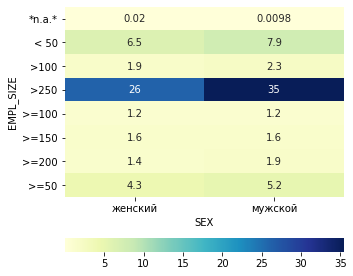

In [11]:
fig = plt.figure(figsize=(5,5))
buf_1 = pd.DataFrame(data.groupby(['SEX','EMPL_SIZE'])['CREDIT_PURPOSE'].count() / n * 100).reset_index()
buf_1 = buf_1.pivot(index='EMPL_SIZE', columns='SEX', values='CREDIT_PURPOSE')
sns.heatmap(buf_1, annot=True, cbar_kws={"orientation": "horizontal"}, cmap='YlGnBu')


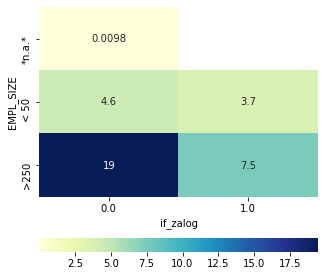

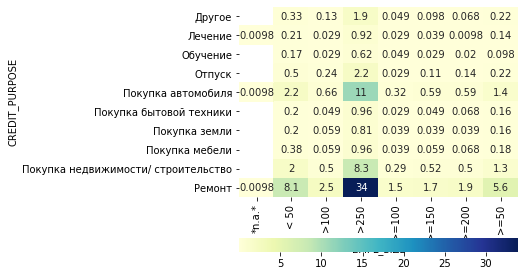

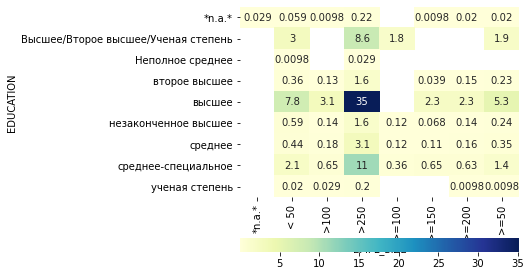

In [12]:
fig = plt.figure(figsize=(5,5))
buf_1 = pd.DataFrame(data.groupby(['if_zalog','EMPL_SIZE'])['CREDIT_PURPOSE'].count()  / n * 100).reset_index()
buf_1 = buf_1.pivot(index='EMPL_SIZE', columns='if_zalog', values='CREDIT_PURPOSE')
sns.heatmap(buf_1, annot=True, cbar_kws={"orientation": "horizontal"}, cmap='YlGnBu')

fig = plt.figure(figsize=(5,5))
buf_1 = pd.DataFrame(data.groupby(['CREDIT_PURPOSE','EMPL_SIZE'])['SEX'].count()  / n * 100).reset_index()
buf_1 = buf_1.pivot(columns='EMPL_SIZE', index='CREDIT_PURPOSE', values='SEX')
sns.heatmap(buf_1, annot=True, cbar_kws={"orientation": "horizontal"}, cmap='YlGnBu')

fig = plt.figure(figsize=(5,5))
buf_1 = pd.DataFrame(data.groupby(['EDUCATION','EMPL_SIZE'])['CREDIT_PURPOSE'].count()  / n * 100).reset_index()
buf_1 = buf_1.pivot(columns='EMPL_SIZE', index='EDUCATION', values='CREDIT_PURPOSE')
sns.heatmap(buf_1, annot=True, cbar_kws={"orientation": "horizontal"}, cmap='YlGnBu')


Видно, что зависимости между данными сильно неоднородные, много выбросов.

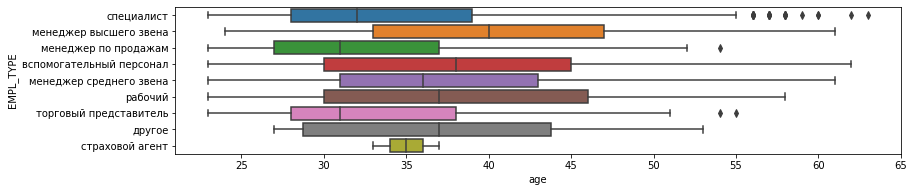

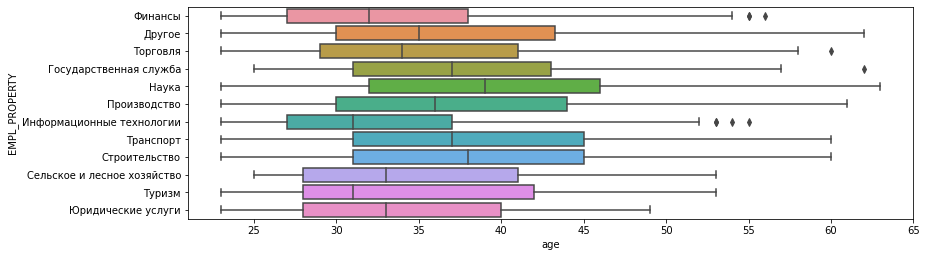

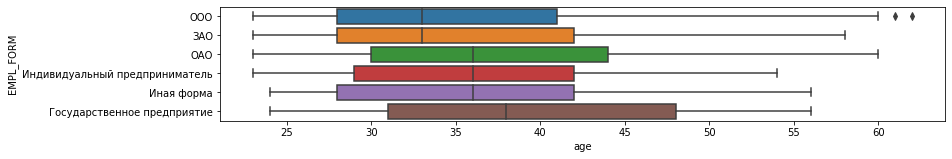

In [13]:
# Категориальные в расчете на возраст для дальнейшей сегментации
for i in ['EMPL_TYPE', 'EMPL_PROPERTY', 'EMPL_FORM']:
    fig = plt.figure(figsize=(13, data[i].unique().shape[0]*0.3))
    sns.boxplot(y=data[i], x=data.age, orient="h")

Заменим пустые признаки на 'unkown' для категориальных и на -1 для числовых.

In [14]:
empty_cat = ['EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 
             'BANKACCOUNT_FLAG']

empty_num = ['Period_at_work', 'avg_num_delay', 'Active_to_All_prc', 
             
             'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage', 
             'sum_of_paym_months', 'all_credits', 'age', 
             'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
             'num_AccountActive180', 'num_AccountActive90' , 'num_AccountActive60', 'numAccountActiveAll',
             'numAccountClosed', 'Active_not_cc', 'own_closed',
             'min_MnthAfterLoan', 'max_MnthAfterLoan']

none = data[data.BANKACCOUNT_FLAG.isna()].BANKACCOUNT_FLAG.loc[7]

for i in empty_cat:
    data = data.replace({i: {none : 'unknown'}})
for i in empty_num:
    data = data.replace({i: {none : -1.0}})


In [15]:
for i in data.columns:
    if type(data[i].loc[0]) == 'float64':
        df[i] = df[i].astype(int)

Выгрузим получившуюся витрину

In [16]:
data.to_csv('var15_ProcessData.tsv', sep=';')


Что если выделить людей незаполнивших форму в отдельный сегмент?

In [17]:
empty_class = data[data.dlq_exist == 'unknown']
filled = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
          'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'Period_at_work', 
          'age', 'EMPL_PROPERTY']
empty_class = empty_class[filled]
empty_class

INCOME_BASE_TYPE  \
0       Форма банка (без печати работодателя)   
4                                       2НДФЛ   
5                                       2НДФЛ   
7                Поступление зарплаты на счет   
8                                       2НДФЛ   
...                                       ...   
10236                                   2НДФЛ   
10237                                   2НДФЛ   
10238  Свободная форма с печатью работодателя   
10240            Поступление зарплаты на счет   
10241                                   2НДФЛ   

                            CREDIT_PURPOSE  INSURANCE_FLAG   DTI      SEX  \
0                                   Отпуск             0.0  0.34  женский   
4                       Покупка автомобиля             1.0  0.55  мужской   
5      Покупка недвижимости/ строительство             1.0  0.59  женский   
7                                   Ремонт             1.0  0.44  женский   
8      Покупка недвижимости/ строительство             1.0  0.49  мужской   
...                                    ...             ...   ...      ...   
10236                               Ремонт             0.0  0.54  женский   
10237                               Ремонт             1.0  0.41  женский   
10238                               Ремонт             1.0  0.48  мужской   
10240                       Покупка мебели             1.0  0.59  женский   
10241                   Покупка автомобиля             0.0  0.52  мужской   

       FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0                          0                 0   
4                          1                 0   
5                          0                 0   
7                          0                 0   
8                          0                 0   
...                      ...               ...   
10236                      1                 0   
10237                      0                 0   
10238                      1                 0   
10240                      0                 0   
10241                      0                 0   

                                 EDUCATION                 EMPL_TYPE  \
0                                   высшее                специалист   
4                                   высшее                специалист   
5                     незаконченное высшее  вспомогательный персонал   
7                                   высшее                специалист   
8                      среднее-специальное  вспомогательный персонал   
...                                    ...                       ...   
10236                               высшее                специалист   
10237                               высшее                специалист   
10238                  среднее-специальное   менеджер среднего звена   
10240  Высшее/Второе высшее/Ученая степень                специалист   
10241  Высшее/Второе высшее/Ученая степень                специалист   

      EMPL_SIZE BANKACCOUNT_FLAG  Period_at_work   age           EMPL_PROPERTY  
0          >250                0            17.0  25.0                 Финансы  
4          >250                3            52.0  25.0  Государственная служба  
5          >250                3            65.0  26.0                   Наука  
7          >100          unknown            -1.0  -1.0                 unknown  
8          >250                3            31.0  45.0            Производство  
...         ...              ...             ...   ...                     ...  
10236      >250                0            16.0  40.0  Государственная служба  
10237      >100          unknown            -1.0  -1.0                 unknown  
10238      >250                0            21.0  36.0                Торговля  
10240      >=50          unknown            -1.0  -1.0                 unknown  
10241      >250                0             8.0  29.0                Торговля  

[6497 rows x 14 columns]

**Сегментация без учителя (K-Means)**  
На основе предварительного анализа имеющихся данных и в ходе экспериментов с несколькими характеристиками были выбраны оптимальные для сегментации: DTI, age. Они представлены наиболее однородно, имеют смысл для сегментации, не нарушают правило "неоднородность между сегментами, максимальная однородность внутри сегмента"


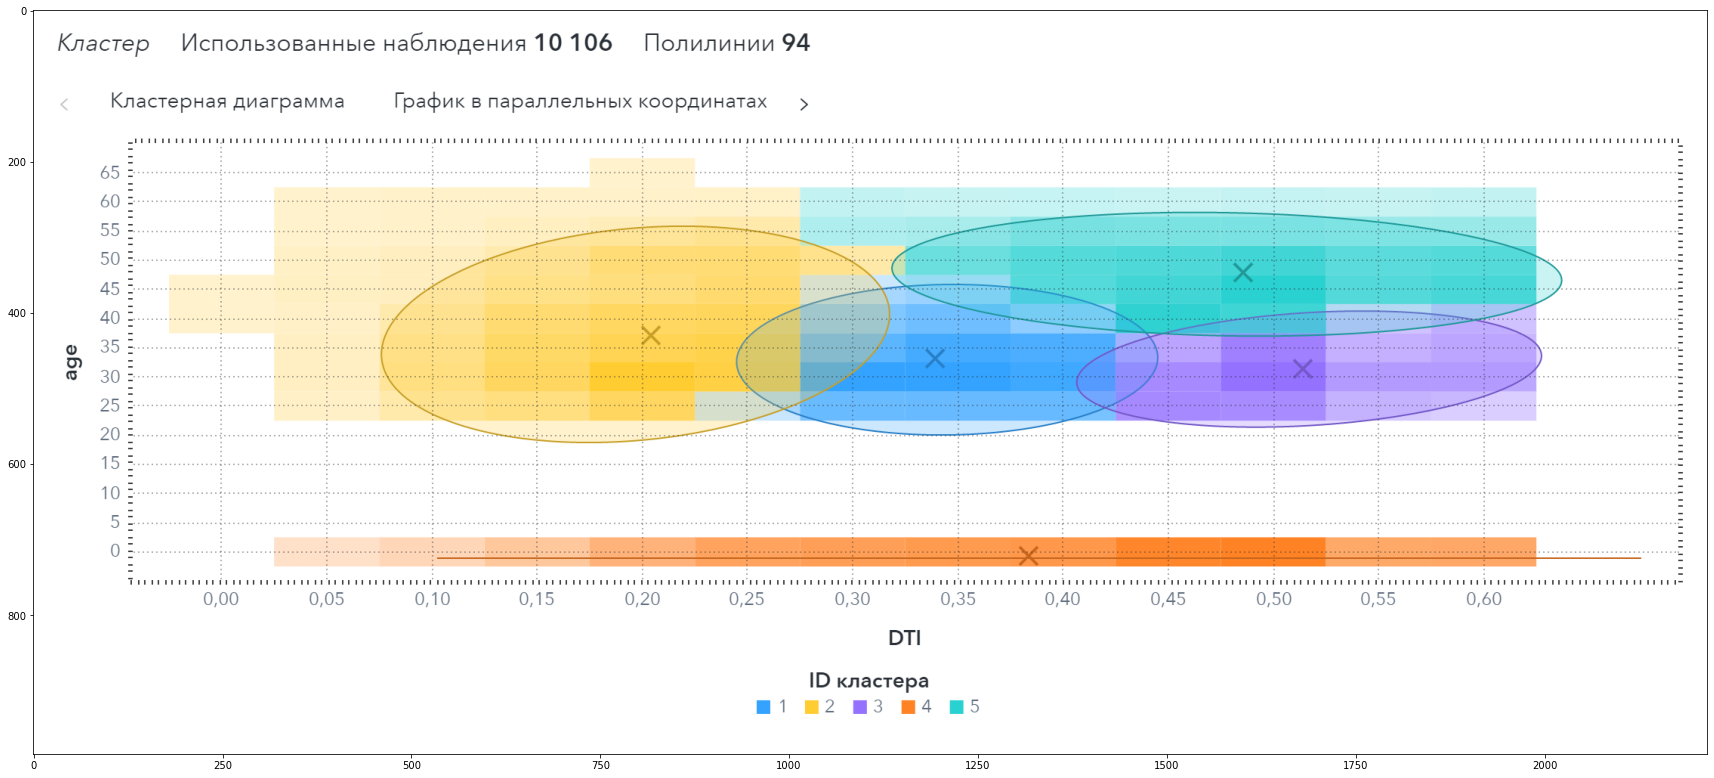

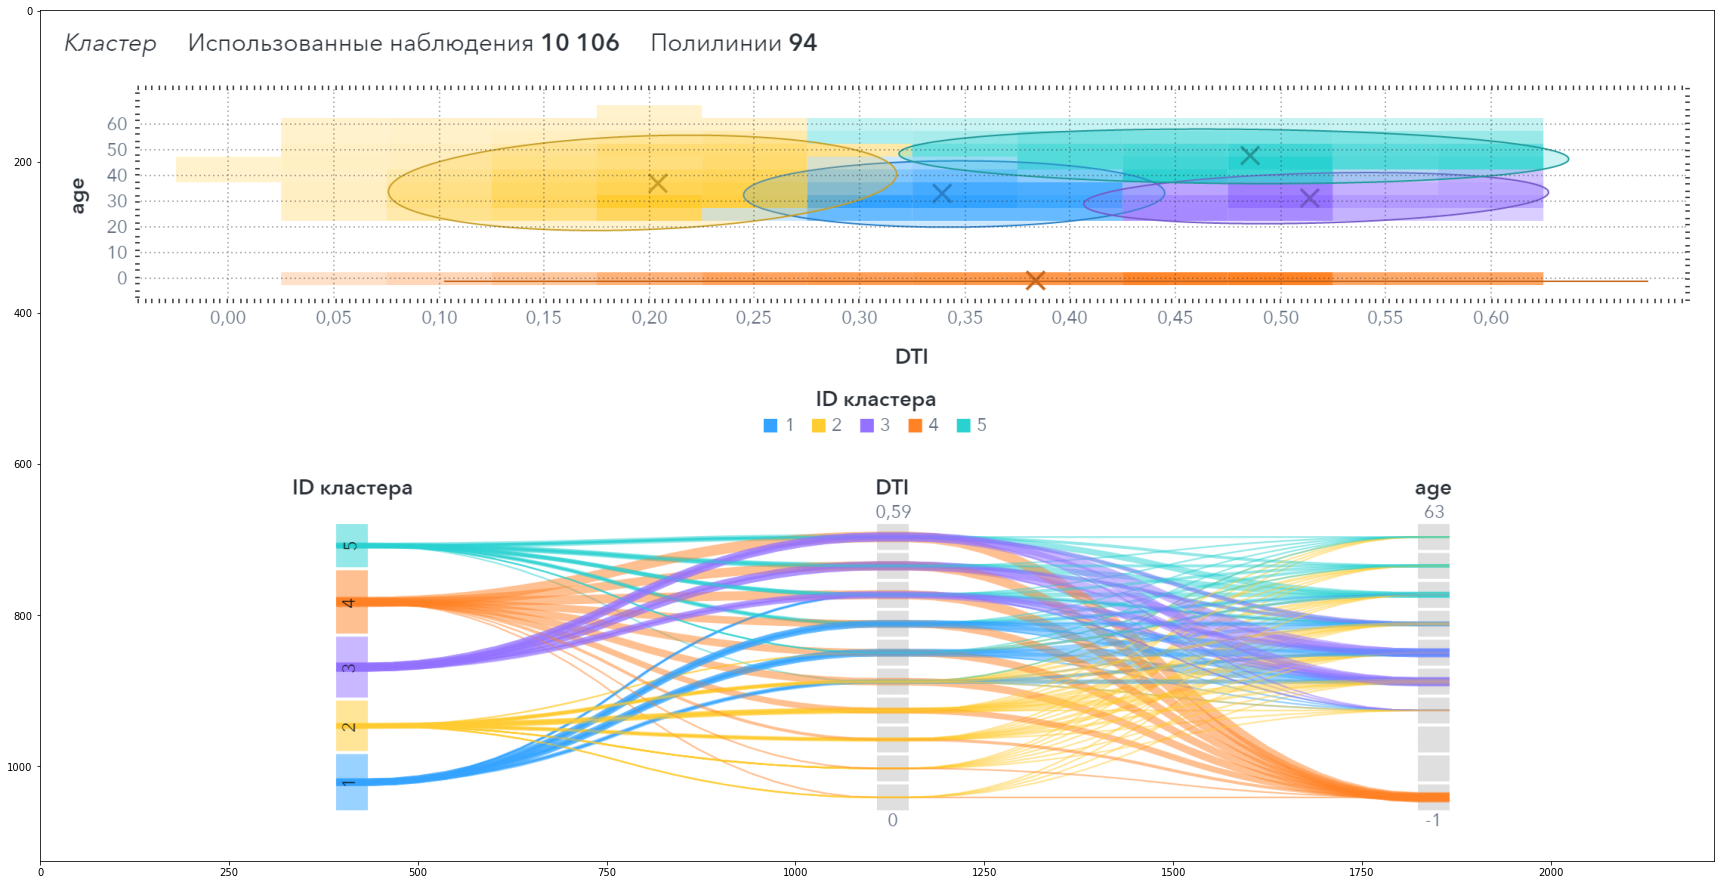

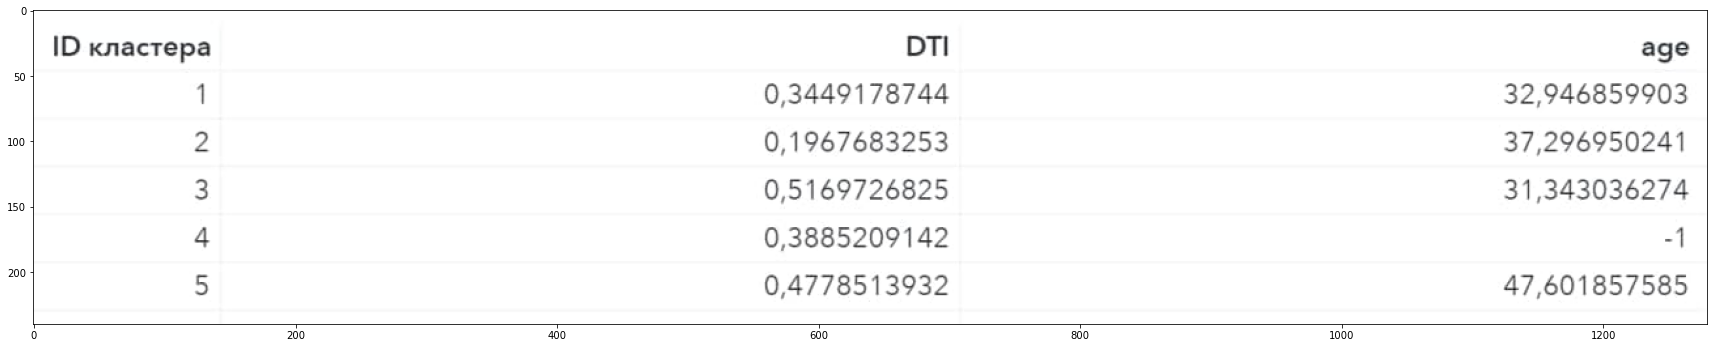

In [19]:
import matplotlib.image as mpimg

fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('KMeans.png'))
plt.show()

fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('KMeans_1.png'))
plt.show()

fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('info.jpg'))
plt.show()

В результате оптимальным кол-вом классов выбрано число 5 для алгоритма. На этом кол-ве лучше всего соблюдается правило "внутри класса однородность максимальна, между классами однородность минимальна".  
Скорректируем выделенные при помощи K-Means кластеры и обозначим получившиеся сегменты:   
  
1. Люди среднего возраста со средним DTI (~0,3 - 0,4)   
2. Люди среднего возраста с низким DTI (~0,1 - 0,2)  
3. Молодые люди до 35 лет с высоким DTI ($\geq $ 0,5)
5. Старшее поколение с высоким DTI (~0,5)  
4. Сегмент клиентов с недостаточным кол-вом информации  
  

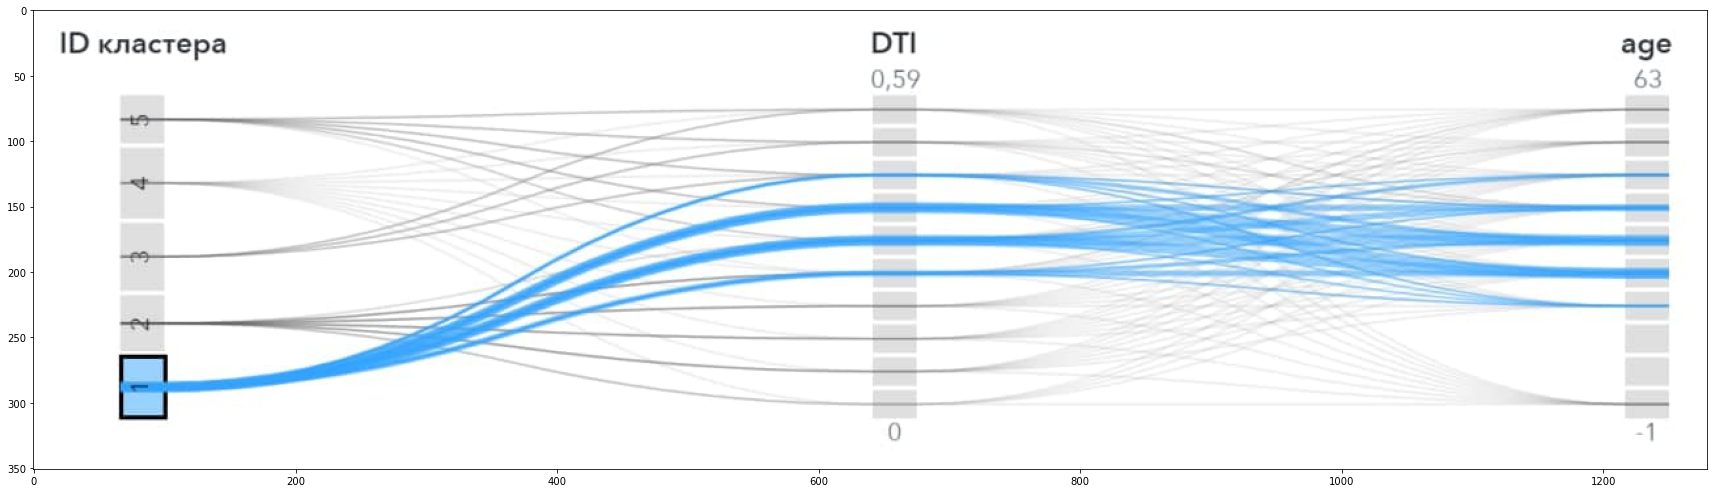

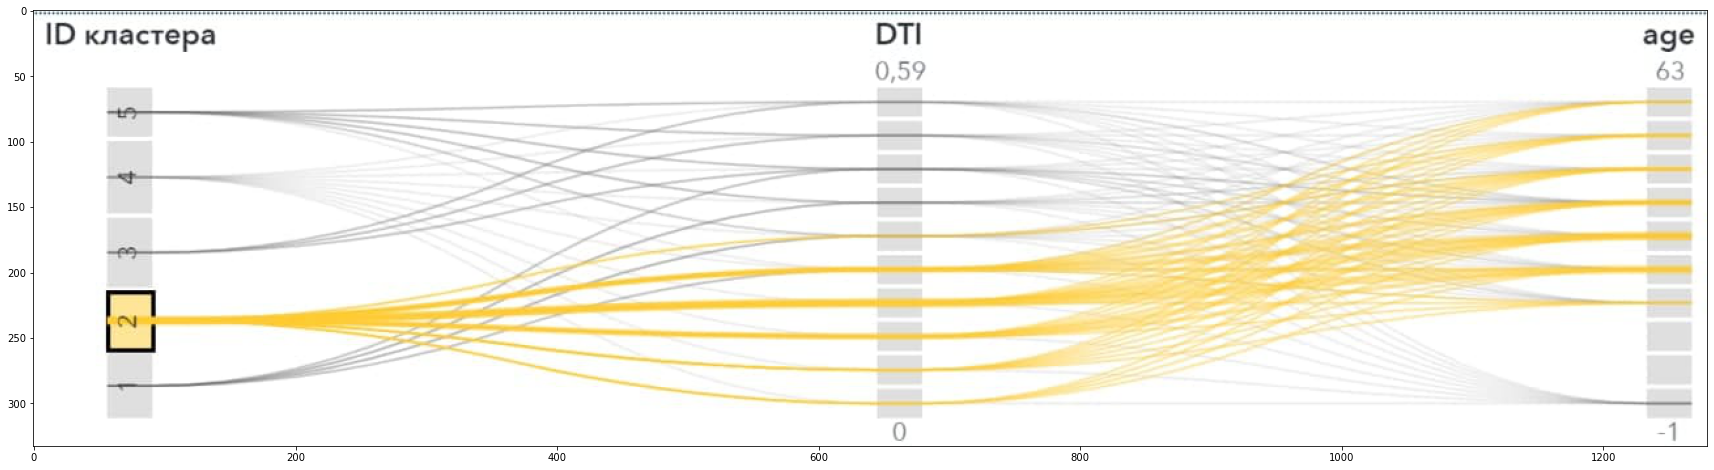

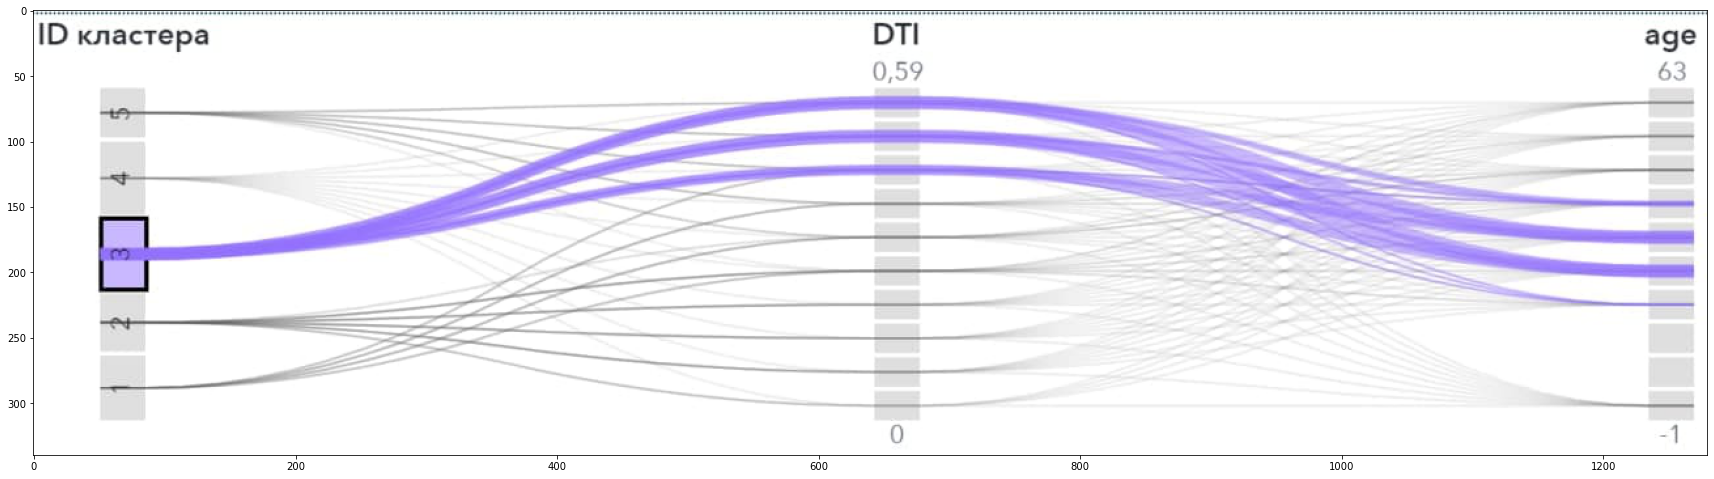

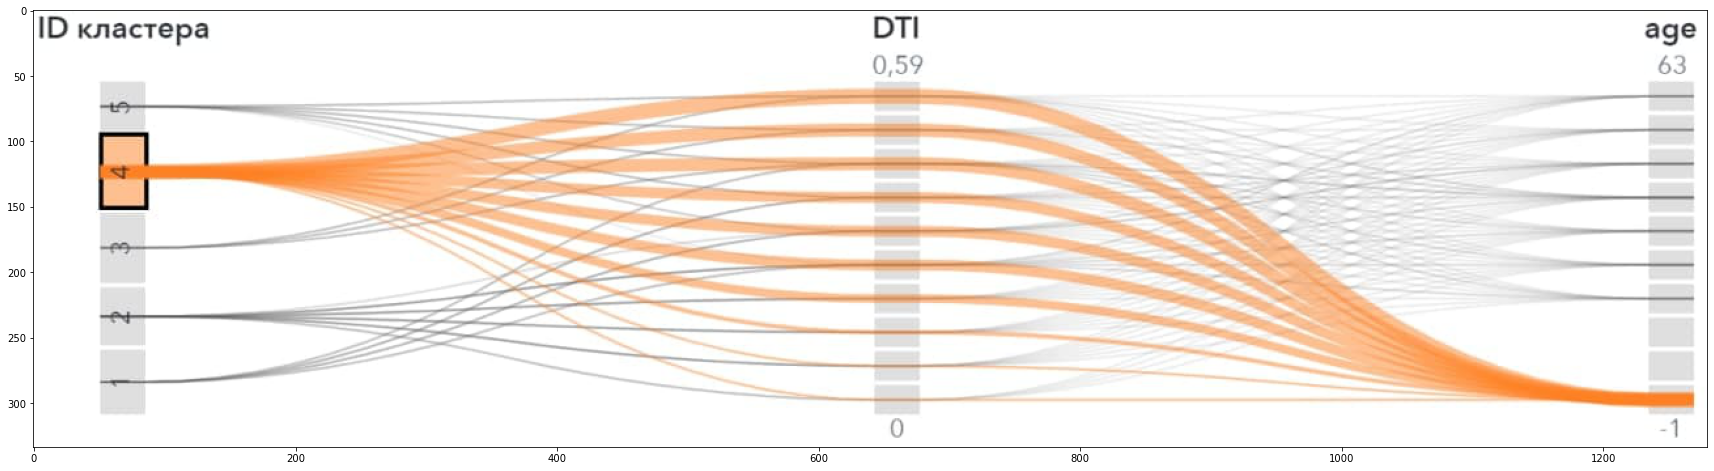

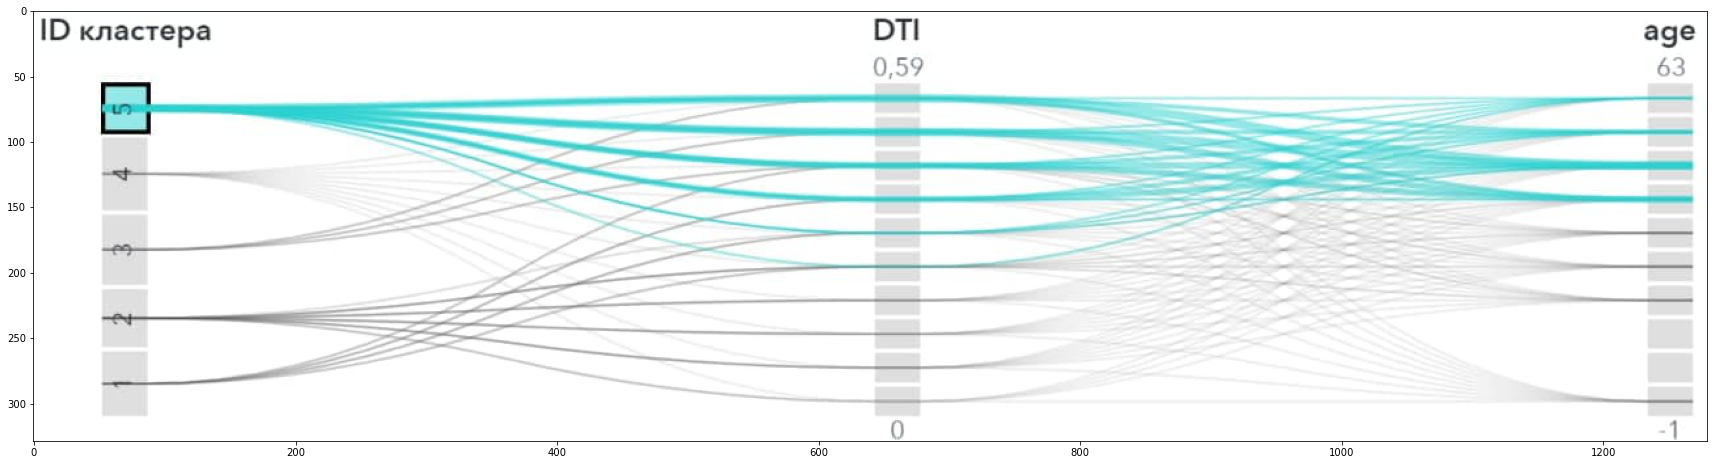

In [21]:
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('class1.jpg'))
plt.show()
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('class2.jpg'))
plt.show()
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('class3.jpg'))
plt.show()
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('class4.jpg'))
plt.show()
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('class5.jpg'))
plt.show()

**Сегментация с учителем (Decision Tree)**  
Для осмысленной сегментации необходимо было правильно подобрать признаки. В итоге некоторых экспериментов таргетом решено было назначить характеристику INCOBE_BASE_TYPE, т.к. нам нужна переменная с однородно представленным кол-вом каждой категории.  
Переменные признаки: sum_of_paymnt_month, DTI, age, all_credits. Они оказались наиболее значимыми для анализа. На остальных переменных есть сильные выбросы или больше неодноодность выборки.  

* Сумма платежей за последний месяц > 140
* Сумма платежей за последний месяц 50-140, DTI меньше 0,4
* Сумма платежей за последний месяц 50-140, DTI больше 0,4, кол-во кредитов до 5
* Сумма платежей за последний месяц 50-140, DTI больше 0,4, кол-во кредитов больше 5 и возраст больше 35
* Сумма платежей за последний месяц 50-140, DTI больше 0,4, кол-во кредитов больше 5 и возраст до 35
* Сумма платежей за последний месяц меньше 50
* Сумма платежей за последний месяц меньше 50, сегмент с малым кол-вом информации, но высоким DTI (больше 0,4)
* Сумма платежей за последний месяц меньше 50, сегмент с малым кол-вом информации, но низким DTI (меньше 0,4)
* Сумма платежей за последний месяц меньше 50, Возраст больше 30, DTI выше среднего (больше 0,4), остальная информация неизвестна
* Сумма платежей за последний месяц меньше 50, Возраст больше 30, DTI ниже среднего (меньше 0,4), остальная информация неизвестна
* Сумма платежей за последний месяц меньше 50, Возраст до 30, DTI средний (примерно 0,3), остальная информация неизвестна
* Сумма платежей за последний месяц меньше 50, Возраст до 30, DTI выше среднего (больше 0,3), остальная информация неизвестна

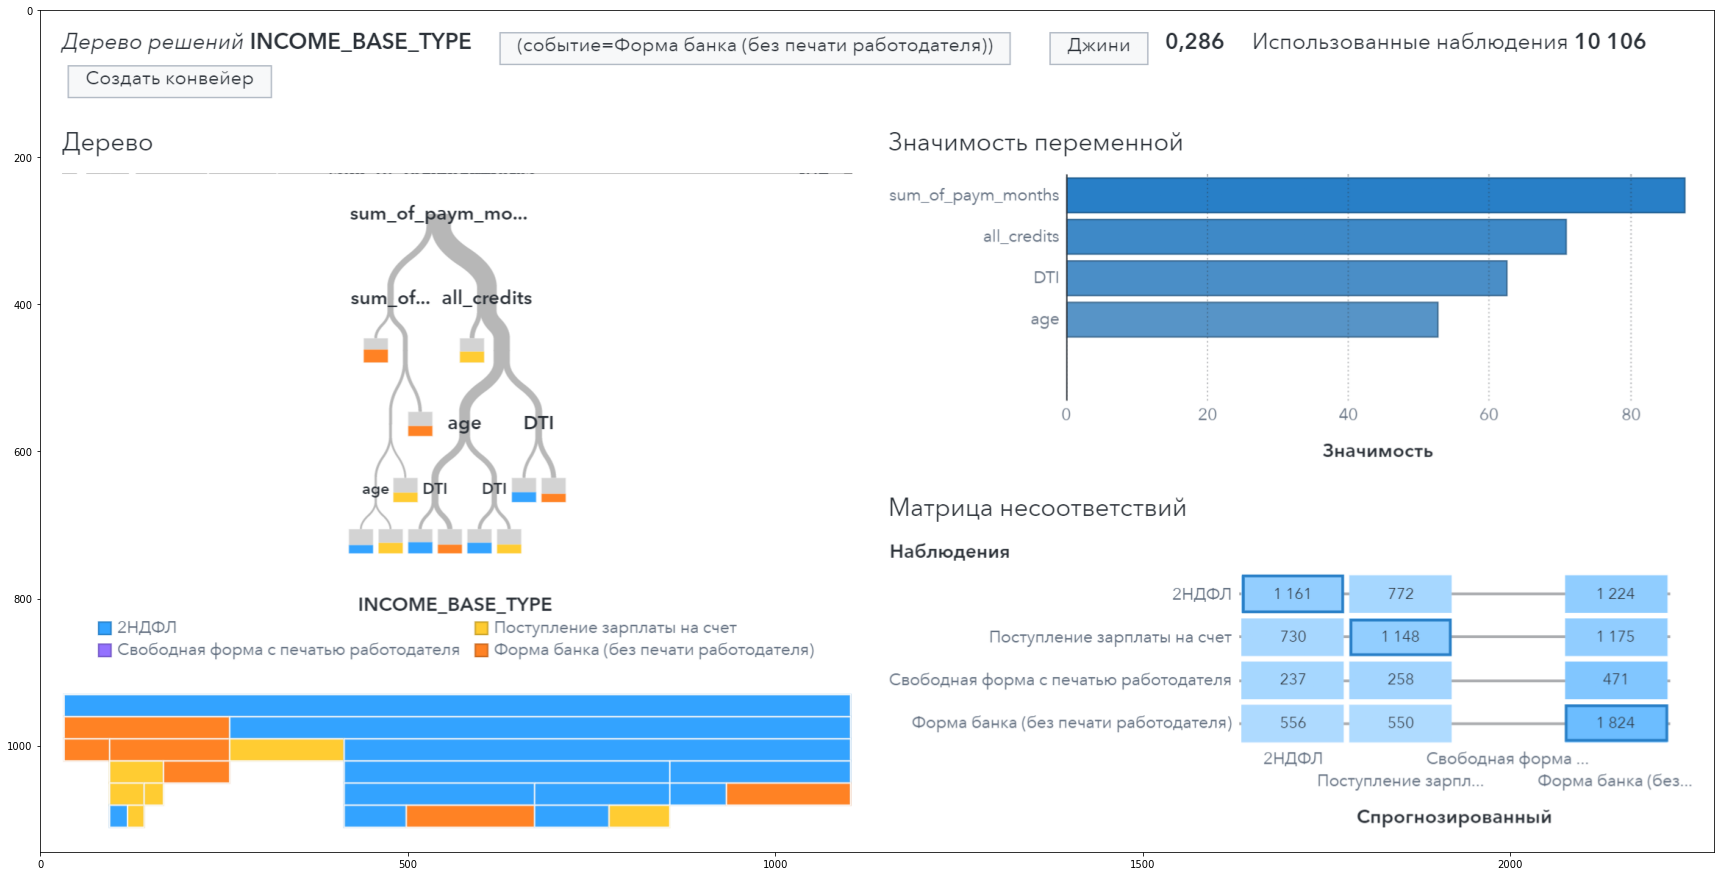

In [22]:
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(mpimg.imread('DTree.png'))
plt.show()


**Мотивация выбора данных методов сегментации**   

Мне интересно было поработать с инструментами платформы SAS - это одна из причин выбора к-средних и дерева решений. Однако были и более рациональные причины. Например, линейные модели для анализа были исключены исходя из 1 части работы - неуместные методы на таких характеристиках.  
**Решающее дерево** требует от выборки таргета, что бывает сложностью, так как не всегда данные представлены однородно и можно одну из характеристик интерпретировать как таргет. Так же данный метод сильно зависит от выборки и выбранных переменных для анализа, нужно подбирать параметры дерева для оптимального разбиения на кластеры. Однако, среди плюсов данного метоа могу выделить автоматизацию (все делает код/платформа, личное мнение человека, анализирующего учитывается только при выборе характеристик для анализа), широкий спектр возможностей для рассмотрения разбиения на сегменты и промотра плоскостей.  
**Метод к-средних** также хорош в том, что за клиента все делает код, личное мнение учитывается только при выборе характеристик для анализа. На данной выборке сегментация, на мой взгляд, проведена хорошо, видны четко разделяющиеся сегменты. Плюс мне проще интерпретировать информацию визуально и у данного метода есть такие возможности. И минусов могу выделить то, что на данной выборке выбросы в данных и высокая неоднородность сильно влияют на разбиение. От части поэтому я выбрала для к-средних всего две характеристики - наиболее осмысленные и представленные одинаковым кол-вом на разных категориях.